1. sklearn中LogisticRegression$L_1$正则化   
$$ J(\beta) + \alpha L_1 \Longrightarrow CJ(\beta) + L_1$$    
2. sklearn中LogisticRegression$L_2$正则化    
$$ J(\beta) + \alpha L_2 \Longrightarrow CJ(\beta) + L_2 $$    

易知:$C$为$\alpha$的倒数,较小的值指定更强的正则化

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X = np.random.normal(0, 1, size=(200, 2))
y = np.array((X[:, 0]**2+X[:, 1])<1.5, dtype=np.int32)
for _ in range(20):
    y[np.random.randint(200)] = 1 # 添加一定噪音

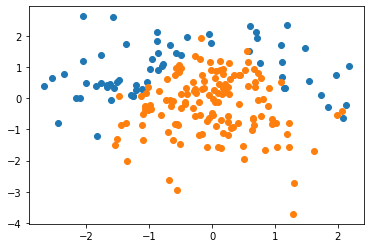

In [2]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

log_reg = LogisticRegression(solver='lbfgs', n_jobs=-1) 
# default:c=1.0
# default:penalty='l2'
# default:solve='lbfgs'(支持L2正则化,不支持L1正则化,支持OvR,MvM).拟牛顿法的一种
#         solve='sag'(支持L2正则化,不支持L1正则化,支持OvR,MvM).随机平均梯度下降法,适用于样本量非常大的数据集
#         solve='saga'(支持L2正则化,不支持L1正则化,还支持elasticnet/弹性网正则化.支持OvR,MvM).An accelerated SAGA variant,线性收敛的随机优化算法的的变种,适用于样本量非常大的数据集
#         solve='liblinear'(支持L2正则化,不支持L1正则化,支持OvR,不支持MvM).开源的liblinear库实现,内部使用了坐标轴下降法来迭代优化损失函数,适用于小数据集
log_reg.fit(X_train, y_train) # 使用直线进行拟合

LogisticRegression(n_jobs=-1)

In [4]:
log_reg.score(X_train, y_train)

0.8466666666666667

In [5]:
log_reg.predict_proba(X_train) # 预测结果天生就可以输出为概率向量

array([[4.63796083e-01, 5.36203917e-01],
       [8.29480443e-02, 9.17051956e-01],
       [7.77536724e-01, 2.22463276e-01],
       [1.40562843e-01, 8.59437157e-01],
       [2.55499057e-01, 7.44500943e-01],
       [5.43544095e-01, 4.56455905e-01],
       [1.49227286e-02, 9.85077271e-01],
       [2.45582153e-01, 7.54417847e-01],
       [1.50188349e-01, 8.49811651e-01],
       [2.71588266e-02, 9.72841173e-01],
       [2.02426907e-01, 7.97573093e-01],
       [2.16704071e-01, 7.83295929e-01],
       [1.62210134e-02, 9.83778987e-01],
       [8.99705141e-01, 1.00294859e-01],
       [1.59870474e-01, 8.40129526e-01],
       [1.86451271e-02, 9.81354873e-01],
       [2.57387559e-01, 7.42612441e-01],
       [6.86329968e-01, 3.13670032e-01],
       [4.54200757e-01, 5.45799243e-01],
       [4.71763368e-01, 5.28236632e-01],
       [2.54749599e-01, 7.45250401e-01],
       [3.03195232e-01, 6.96804768e-01],
       [3.04344108e-04, 9.99695656e-01],
       [7.62831100e-01, 2.37168900e-01],
       [1.071726

In [6]:
log_reg.predict(X_train) # Predict class labels for samples in X.

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [7]:
log_reg.score(X_test, y_test) # 欠拟合

0.78

In [8]:
def plot_decision_boundary(model, 
                           axis): # 坐标轴范围
    """绘制决策边界""" 
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*200)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*200)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['yellow', 'red'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

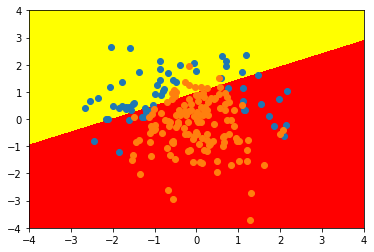

In [9]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [10]:
def PolynomialLogisticRegression(degree):
    # 管道机制实现了对全部步骤的流式化封装和管理
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(n_jobs=-1, solver='lbfgs'))
    ])

In [11]:
poly_log_reg = PolynomialLogisticRegression(degree=2) # 多项式最高项次数为2
poly_log_reg.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression(n_jobs=-1))])

In [12]:
poly_log_reg.score(X_train, y_train)

0.92

In [13]:
poly_log_reg.score(X_test, y_test) # 拟合程度较好

0.9

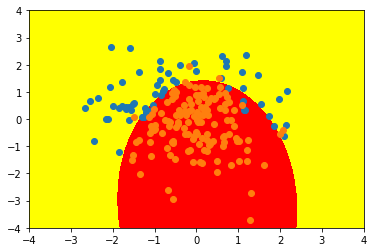

In [14]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [15]:
poly_log_reg[2].coef_ # 解释变量(项)的系数

array([[ 0.        ,  0.6730336 , -2.42318499, -2.42113442, -0.07683733,
        -0.67582042]])

In [16]:
poly_log_reg[2].intercept_ # 截距项

array([1.33376235])

In [17]:
poly_log_reg[0].get_feature_names() # 多项式的各项

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [18]:
poly_log_reg2 = PolynomialLogisticRegression(degree=20) # 多项式最高项次数为20
poly_log_reg2.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression(n_jobs=-1))])

In [19]:
poly_log_reg2.score(X_train, y_train)

0.92

In [20]:
poly_log_reg2.score(X_test, y_test) # score没有得到提高

0.94

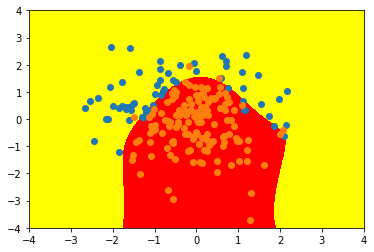

In [21]:
plot_decision_boundary(poly_log_reg2, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show() # 决策边界复杂,可能出现了过拟合

In [22]:
def PolynomialLogisticRegression(degree, C, penalty='l2'):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C, penalty=penalty, n_jobs=-1, solver='saga', max_iter=1000))
    ])

In [23]:
poly_log_reg3 = PolynomialLogisticRegression(degree=20, C=0.1, penalty='l2')
poly_log_reg3.fit(X_train, y_train)

C:\Users\duanm\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(C=0.1, max_iter=1000, n_jobs=-1,
                                    solver='saga'))])

In [24]:
poly_log_reg3.score(X_train, y_train)

0.8866666666666667

In [25]:
poly_log_reg3.score(X_test, y_test)

0.86

In [26]:
poly_log_reg3[2].coef_ # L2正则不能将多项式系数收缩为0

array([[ 0.00000000e+00,  2.61075539e-01, -7.40785250e-01,
        -7.48794131e-01,  1.04495535e-01, -3.16657573e-01,
         1.49346228e-01, -4.43834146e-01,  6.65102228e-02,
        -3.58611727e-01, -3.97239714e-01,  8.41724171e-03,
        -1.70484441e-01,  2.40620414e-02, -1.23342661e-01,
         7.12283217e-02, -1.46227266e-01,  3.89172434e-02,
        -1.35356425e-01,  1.01164495e-03, -1.20167787e-01,
        -2.26061637e-01, -7.71204041e-03, -1.13281176e-01,
        -5.03149955e-04, -3.47336428e-02,  5.58969807e-03,
        -3.60569745e-02,  3.26028256e-02, -3.85379876e-02,
         3.63750091e-02, -5.35842445e-02,  6.99379262e-03,
        -4.41709116e-02, -5.55392437e-03, -3.90312918e-02,
        -1.40007147e-01, -1.89298832e-03, -9.68945138e-02,
        -5.23226075e-03, -2.17633518e-02,  3.61425840e-03,
        -1.01514485e-02,  2.56003936e-03, -1.00099576e-02,
         1.68095585e-02, -6.74036170e-03,  3.26690969e-02,
        -2.05719047e-02,  1.45714938e-02, -2.72014799e-0

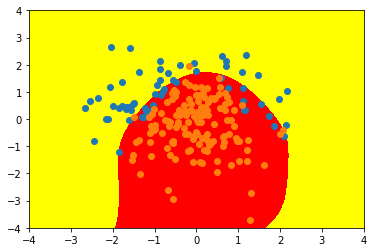

In [27]:
plot_decision_boundary(poly_log_reg3, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [28]:
poly_log_reg4 = PolynomialLogisticRegression(degree=20, C=0.1, penalty='l1')
poly_log_reg4.fit(X_train, y_train)

C:\Users\duanm\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(C=0.1, max_iter=1000, n_jobs=-1,
                                    penalty='l1', solver='saga'))])

In [29]:
poly_log_reg4.score(X_train, y_train)

0.8666666666666667

In [30]:
poly_log_reg4.score(X_test, y_test)

0.94

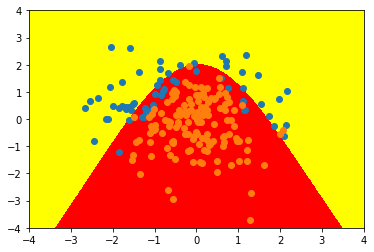

In [31]:
plot_decision_boundary(poly_log_reg4, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [32]:
poly_log_reg4[2].coef_ # L1正则可以将某些多项式系数收缩为0,因此可以给出一个简单的可解释的模型

array([[ 0.        ,  0.0603117 , -0.86276261, -0.84721836,  0.        ,
         0.        ,  0.        , -0.10983221,  0.        ,  0.        ,
        -0.05640225,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 